In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

import warnings 
from scipy import stats
from scipy.stats import norm
warnings.filterwarnings('ignore')

In [192]:
train=pd.read_csv('bigdatamart_Train.csv')
test=pd.read_csv('bigdatamart_Test.csv')

In [193]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [194]:
print("Train : ", train.shape)


Train :  (8523, 12)


In [195]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [196]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [197]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [198]:
train['Outlet_Size'] = train['Outlet_Size'].map({'Small':1, 'Medium':2, 'High':3})
train['Outlet_Size'].median()

2.0

In [199]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mean(),inplace=True)
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [200]:
train['Outlet_Size'] = train['Outlet_Size'].replace(1.000000,'Small')
train['Outlet_Size'] = train['Outlet_Size'].replace(2.000000,'Medium')
train['Outlet_Size'] = train['Outlet_Size'].replace(3.000000,'High')

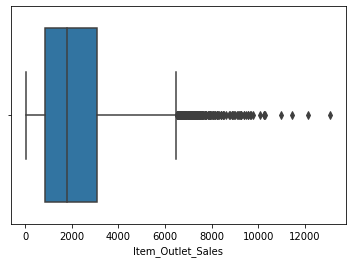

In [201]:
sns.boxplot('Item_Outlet_Sales',data=train)

In [202]:
train=train[train['Item_Outlet_Sales']<6250]

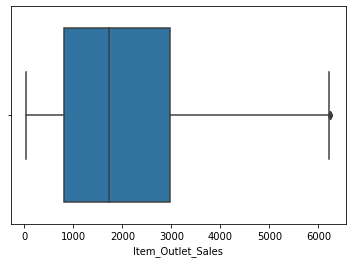

In [203]:
sns.boxplot('Item_Outlet_Sales',data=train)

In [204]:
train.skew()

Item_Weight                  0.090425
Item_Visibility              1.165563
Item_MRP                     0.154516
Outlet_Establishment_Year   -0.418924
Item_Outlet_Sales            0.746550
dtype: float64

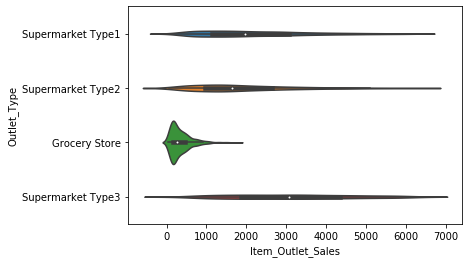

In [205]:
sns.violinplot(x='Item_Outlet_Sales', y='Outlet_Type', data = train, split = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

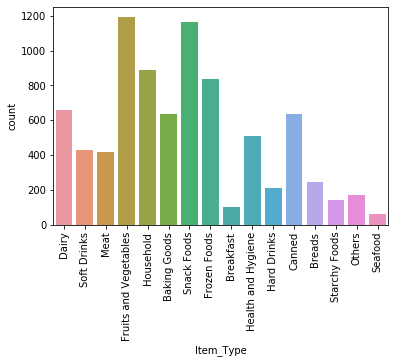

In [206]:
sns.countplot(train['Item_Type'])
plt.xticks(rotation=90)

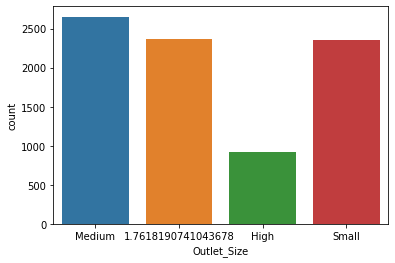

In [207]:
sns.countplot(train['Outlet_Size'])

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

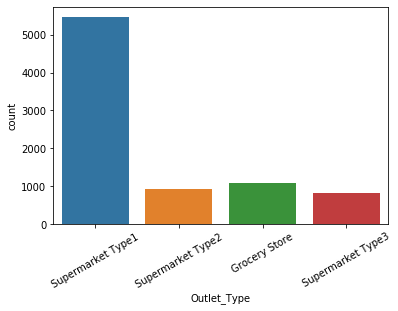

In [208]:
sns.countplot(train['Outlet_Type'])
plt.xticks(rotation=30)

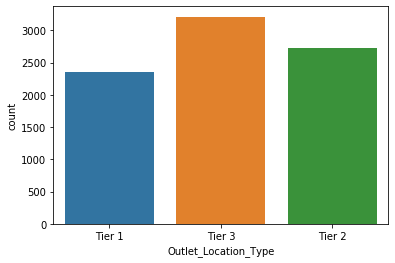

In [209]:
sns.countplot(train['Outlet_Location_Type'])

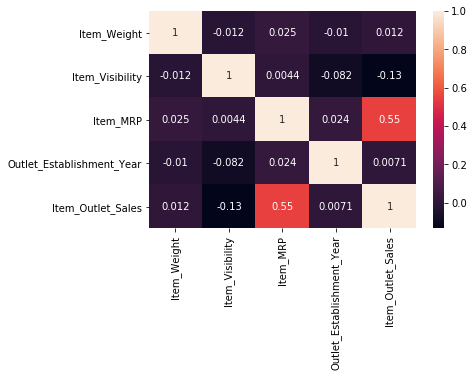

In [210]:
sns.heatmap(train.corr(), annot=True)

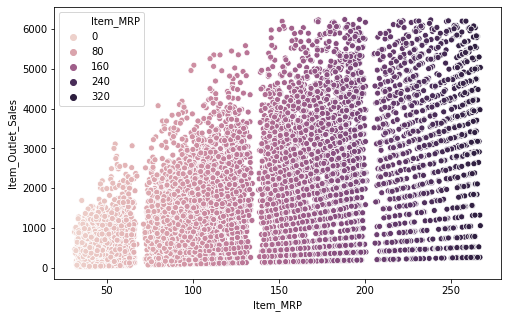

In [211]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_MRP',data=train)

In [212]:
IT = pd.get_dummies(train['Item_Type'],prefix='ItemType',drop_first=True)
train = pd.concat([train,IT],axis=1)

OI = pd.get_dummies(train['Outlet_Identifier'],prefix='OutIden',drop_first=True)
train = pd.concat([train,OI],axis=1)

OLT = pd.get_dummies(train['Outlet_Location_Type'],prefix='OutLocTy',drop_first=True)
train = pd.concat([train,OLT],axis=1)

OT = pd.get_dummies(train['Outlet_Type'],prefix='OutTy',drop_first=True)
train = pd.concat([train,OT],axis=1)

OS = pd.get_dummies(train['Outlet_Size'],prefix='OutSz',drop_first=True)
train = pd.concat([train,OS],axis=1)

OEY = pd.get_dummies(train['Outlet_Establishment_Year'],prefix='OutEstYear',drop_first=True)
train = pd.concat([train,OEY],axis=1)

In [213]:
train.drop(['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Outlet_Size','Outlet_Establishment_Year'],axis=1,inplace=True)

In [214]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8294 entries, 0 to 8522
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Item_Identifier                 8294 non-null   object 
 1   Item_Weight                     8294 non-null   float64
 2   Item_Visibility                 8294 non-null   float64
 3   Item_MRP                        8294 non-null   float64
 4   Item_Outlet_Sales               8294 non-null   float64
 5   ItemType_Breads                 8294 non-null   uint8  
 6   ItemType_Breakfast              8294 non-null   uint8  
 7   ItemType_Canned                 8294 non-null   uint8  
 8   ItemType_Dairy                  8294 non-null   uint8  
 9   ItemType_Frozen Foods           8294 non-null   uint8  
 10  ItemType_Fruits and Vegetables  8294 non-null   uint8  
 11  ItemType_Hard Drinks            8294 non-null   uint8  
 12  ItemType_Health and Hygiene     82

In [215]:
x = train.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)
y = train['Item_Outlet_Sales']

In [216]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [217]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

y_lr = lr.predict(x_test)

In [218]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

MSE=mean_squared_error(y_test,y_lr)
MAE=mean_absolute_error(y_test,y_lr)
r2=r2_score(y_test,y_lr)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

R squared value:  0.5460895987516261
Root Mean Squared Error :  994.7299236404217
Mean Absolute Error :  762.3038747073249


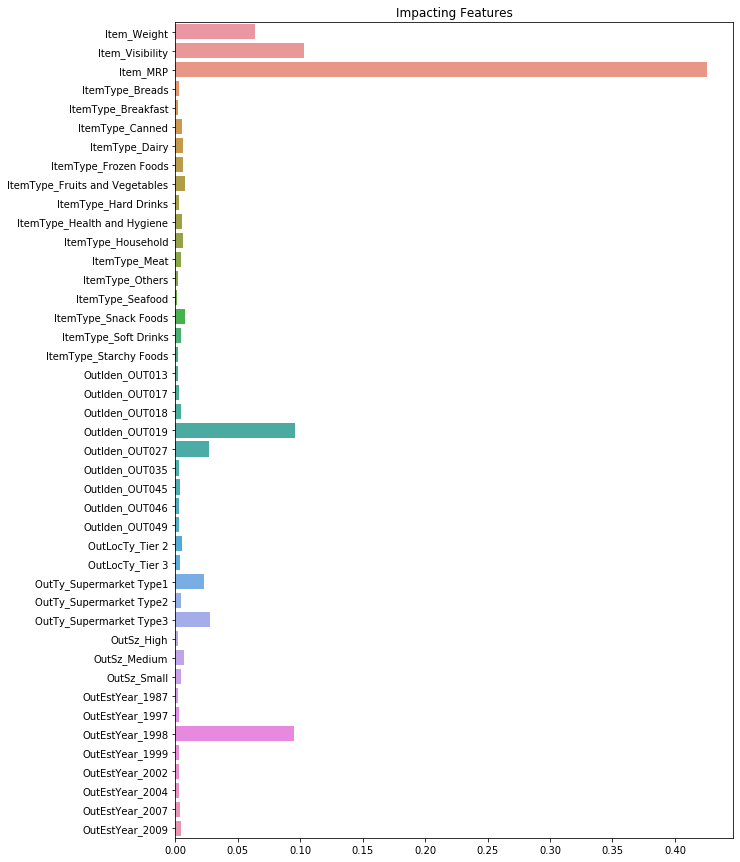

In [219]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=100)
reg.fit(x_train,y_train)

feature_imp = pd.Series(reg.feature_importances_,index=x_train.columns)

plt.figure(figsize=(10,15))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.title("Impacting Features")
plt.show()

In [220]:
rfr_reg=RandomForestRegressor(n_estimators=200)
rfr_reg.fit(x_train,y_train)

y_rfreg = rfr_reg.predict(x_test)

# TESTING PHASE

In [221]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [222]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [223]:
print("Test : ", test.shape)

Test :  (5681, 11)


In [224]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [225]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [226]:
test['Outlet_Size'] = test['Outlet_Size'].map({'Small':1, 'Medium':2, 'High':3})

test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].median())
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [227]:
test['Outlet_Size'] = test['Outlet_Size'].replace(1.000000,'Small')
test['Outlet_Size'] = test['Outlet_Size'].replace(2.000000,'Medium')
test['Outlet_Size'] = test['Outlet_Size'].replace(3.000000,'High')

In [228]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


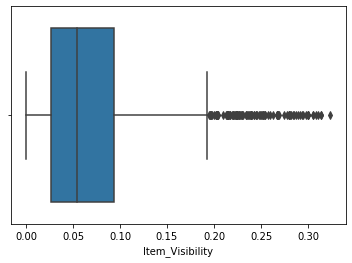

In [229]:
sns.boxplot('Item_Visibility',data=test)

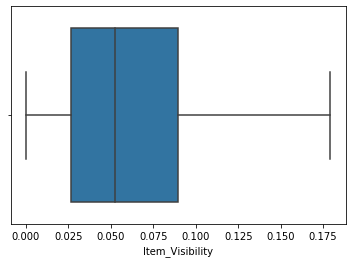

In [230]:
test=test[test['Item_Visibility']<0.18]
sns.boxplot('Item_Visibility',data=test)

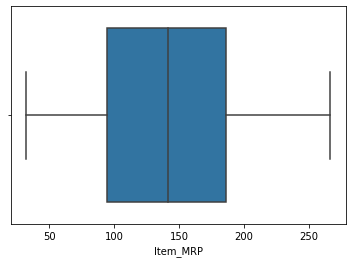

In [231]:
sns.boxplot('Item_MRP',data=test)

In [232]:
Pred_LR = pd.DataFrame(test['Item_Identifier'])
Pred_LR['Outlet_Identifier'] = test['Outlet_Identifier']

Pred_RFR = pd.DataFrame(test['Item_Identifier'])
Pred_RFR['Outlet_Identifier'] = test['Outlet_Identifier']

In [233]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('low fat', 'Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('reg', 'Regular')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('LF', 'Low Fat')

test['Item_Fat_Content'] = test['Item_Fat_Content'].map({'Low Fat': 1, 'Regular': 0})

In [234]:
IT = pd.get_dummies(test['Item_Type'],prefix='ItemType',drop_first=True)
test = pd.concat([test,IT],axis=1)

OI = pd.get_dummies(test['Outlet_Identifier'],prefix='OutIden',drop_first=True)
test = pd.concat([test,OI],axis=1)

OLT = pd.get_dummies(test['Outlet_Location_Type'],prefix='OutLocTy',drop_first=True)
test = pd.concat([test,OLT],axis=1)

OT = pd.get_dummies(test['Outlet_Type'],prefix='OutTy',drop_first=True)
test = pd.concat([test,OT],axis=1)

OS = pd.get_dummies(test['Outlet_Size'],prefix='OutSz',drop_first=True)
test = pd.concat([test,OS],axis=1)

OEY = pd.get_dummies(test['Outlet_Establishment_Year'],prefix='OutEstYear',drop_first=True)
test = pd.concat([test,OEY],axis=1)

In [235]:
test.drop(['Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Outlet_Size','Outlet_Establishment_Year'],axis=1,inplace=True)

In [236]:
test.drop('Item_Identifier',axis=1,inplace=True)

In [237]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,ItemType_Breads,ItemType_Breakfast,ItemType_Canned,ItemType_Dairy,ItemType_Frozen Foods,ItemType_Fruits and Vegetables,...,OutSz_Medium,OutSz_Small,OutEstYear_1987,OutEstYear_1997,OutEstYear_1998,OutEstYear_1999,OutEstYear_2002,OutEstYear_2004,OutEstYear_2007,OutEstYear_2009
0,20.750000,1,0.007565,107.8622,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,8.300000,0,0.038428,87.3198,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,14.600000,1,0.099575,241.7538,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,7.315000,1,0.015388,155.0340,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,12.695633,0,0.118599,234.2300,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [238]:
item_sales_lr = lr.predict(test)

Pred_LR['Item_Outlet_Sales'] = item_sales_lr
Pred_LR.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1586.497395
1,FDW14,OUT017,1301.769714
2,NCN55,OUT010,3362.312284
3,FDQ58,OUT017,2204.893087
4,FDY38,OUT027,4144.780632


In [239]:
item_sales_rfr = rfr_reg.predict(test)

Pred_RFR['Item_Outlet_Sales'] = item_sales_rfr
Pred_RFR.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,380.567951
1,FDW14,OUT017,364.678634
2,NCN55,OUT010,614.300370
3,FDQ58,OUT017,531.404941
4,FDY38,OUT027,738.362213
